In [1]:
%pylab inline

import pandas as pd
%load_ext autoreload
%autoreload 2
import pysfg

Populating the interactive namespace from numpy and matplotlib


# Quartz or Gold Spectrum for Normalization

Process the data. The *static_spectra.py* is the template script. The *simple_gold.yaml* file contains the configuration of the template script. Aka the variables like filenames and so on.

In [2]:
%run static_spectra.py simple_gold.yaml

INFO:root:Importing: ../tests/data/gold.dat
INFO:root:Using Calibration with:
Central Wavelength: 680.0
Visible Wavelength: 799.7
Calibration Coefficients: (0.080881, 615.18)
Calibration Central Wavelength: 680.0

/home/malte/Projects/pysfg/templates/static_spectra.py:43: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  background_data['data'][background_select.select],
/home/malte/Projects/pysfg/templates/static_spectra.py:55: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data['data'][data_select.select],
/home/malte/Projects/pysfg/template

The log above gives you some information on what is happending. It tels you the path of the importet data, the calibration configuartion and the path where the result is exportet. The *static_spectra.py* script itself does what you typically want to do with a static spectrum. If you need more advanced control, consider writing your own template script but for now lets see what we can do with the here given version.


Import result and visualize something

Text(0.5, 1.0, 'Normalization')

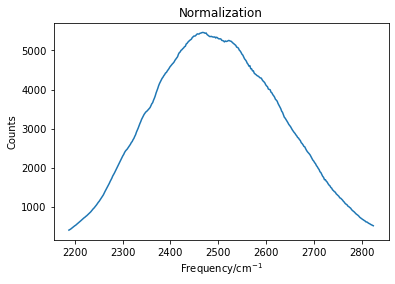

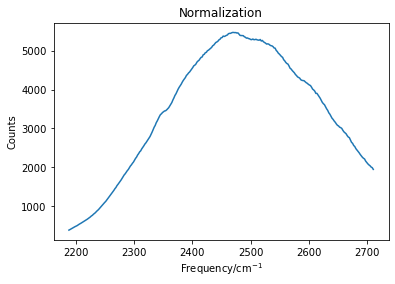

In [3]:
norm = pysfg.spectrum.json_to_spectrum('cache/gold_1.json')
norm2 = pysfg.spectrum.json_to_spectrum('cache/gold_2.json')

pixel=[460, 810]

# Figures
fig, ax = plt.subplots()
plt.plot(norm.wavenumber[slice(*pixel)], norm.basesubed[slice(*pixel)])
plt.xlabel('Frequency/cm$^{-1}$')
plt.ylabel('Counts')
plt.title('Normalization')

# Figures
fig, ax = plt.subplots()
plt.plot(norm2.wavenumber, norm2.basesubed)
plt.xlabel('Frequency/cm$^{-1}$')
plt.ylabel('Counts')
plt.title('Normalization')

In the example above, the calibration is manually passed within the *simple_gold.yaml* file in the *calibration* section. This is needed, because the read file *../tests/data/gold.dat* contains no correct calibration data. Just open the file and check out the `# calib Coeff=0` line. This is not a correct calibration. The file *../tests/data/sc_quartz.dat* contains a correct calibration. Checkout the file header. It reads: `# calib Coeff=670	642.101	0.034274	0	0	0	0` 

*simple_quarty.yaml* shows you a configuration that reads the information of the file itself.

In [4]:
%run static_spectra.py simple_quartz.yaml

INFO:root:Importing: ../tests/data/sc_quartz.dat
INFO:root:Using Calibration with:
Central Wavelength: 674.0
Visible Wavelength: 811.7
Calibration Coefficients: (0.034274, 642.101)
Calibration Central Wavelength: 670.0

/home/malte/Projects/pysfg/templates/static_spectra.py:43: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  background_data['data'][background_select.select],
/home/malte/Projects/pysfg/templates/static_spectra.py:55: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data['data'][data_select.select],
/home/malte/Projects/pysfg/te

<Figure size 432x288 with 0 Axes>

Again import and visualize

Text(0.5, 1.0, 'Normalization')

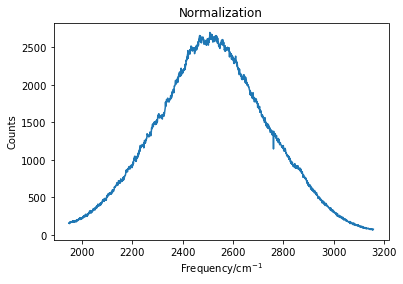

In [5]:
norm = pysfg.spectrum.json_to_spectrum('cache/quartz_1.json')
pixel=slice(None)

# Figures
fig, ax = plt.subplots()
plt.plot(norm.wavenumber[pixel], norm.basesubed[pixel])
plt.xlabel('Frequency/cm$^{-1}$')
plt.ylabel('Counts')
plt.title('Normalization')

# Normalize a Static Spectrum

To normalize some static spectra, you can use the same template script *static_spectra.py*. However you have to change the specific configuration of course.

In [6]:
%run static_spectra.py simple_spectrum.yaml

INFO:root:Importing: ../tests/data/sc_d2o-dopc.dat
INFO:root:Using Calibration with:
Central Wavelength: 674.0
Visible Wavelength: 811.7
Calibration Coefficients: (0.034274, 642.101)
Calibration Central Wavelength: 670.0

/home/malte/Projects/pysfg/templates/static_spectra.py:43: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  background_data['data'][background_select.select],
/home/malte/Projects/pysfg/templates/static_spectra.py:55: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data['data'][data_select.select],
/home/malte/Projects/pysfg/

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Normalization')

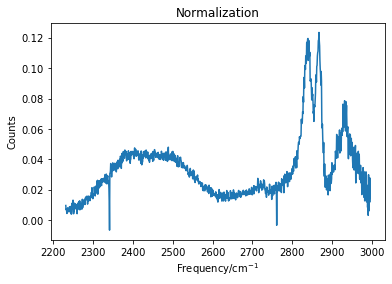

In [7]:
sc = pysfg.spectrum.json_to_spectrum('cache/sc_d2o-dopc_static.json')

# Figures
fig, ax = plt.subplots()
plt.plot(sc.wavenumber, sc.normalized)
plt.xlabel('Frequency/cm$^{-1}$')
plt.ylabel('Counts')
plt.title('Normalization')